In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot:>

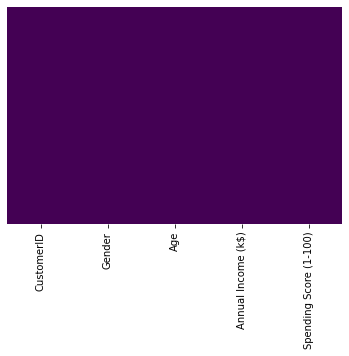

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Choosing the Annual column & spending score column

In [11]:
x = data.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [12]:
# choosing the number of cluster

In [13]:
# wcss--> within cluster sum of Squares

In [14]:
# finding wcss value for different number of cluster

In [15]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kme

In [16]:
# plot an elbow graph

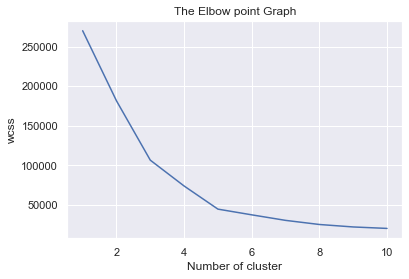

In [17]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow point Graph')
plt.xlabel('Number of cluster')
plt.ylabel('wcss')
plt.show()

In [18]:
# optimum number of cluster =5

In [19]:
# Training thek-means clustering model

In [20]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)

# return a label for each data point on their cluster

y = kmeans.fit_predict(x)
print(y)

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [21]:
#visualizing all the cluster

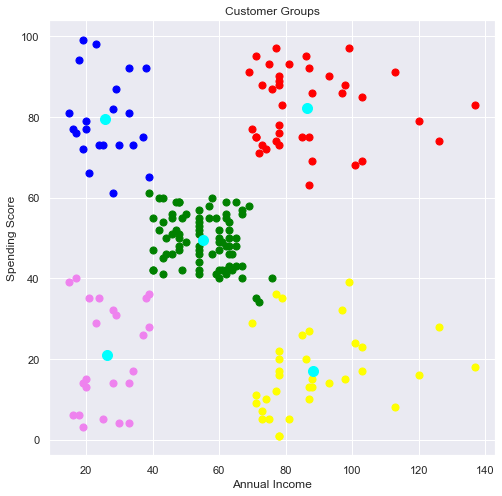

In [22]:
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='violet',label='Cluster 4')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='blue',label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# save the model

In [23]:
import joblib

In [25]:
joblib.dump(kmeans,'Customer_segmentation')

['Customer_segmentation']

In [26]:
model = joblib.load('Customer_segmentation')

In [29]:
model.predict([[15,81]])

array([4])

# GUI

In [1]:
from tkinter import *
import joblib

def show_entry_fields():
    p1 = int(e1.get())  # Corrected variable name
    p2 = int(e2.get())  # Corrected variable name
   
    model = joblib.load('Customer_segmentation')
    result = model.predict([[p1, p2]])
    print('This Customer belongs to cluster no:', result[0])
    
    if result[0] == 0:
        Label(master, text='Customer with medium annual income and medium a').grid(row=4, columnspan=2)  # Corrected string termination and added grid position
    elif result[0] == 1:
        Label(master, text='Customer with medium annual income and medium b').grid(row=4, columnspan=2)  # Corrected string and added grid position
    elif result[0] == 2:
        Label(master, text='Customer with medium annual income and medium c').grid(row=4, columnspan=2)  # Corrected string and added grid position
    elif result[0] == 3:
        Label(master, text='Customer with medium annual income and medium d').grid(row=4, columnspan=2)  # Corrected string and added grid position
    elif result[0] == 4:
        Label(master, text='Customer with medium annual income and medium e').grid(row=4, columnspan=2)  # Corrected string and added grid position

master = Tk()
master.title("Customer Segmentation")

label = Label(master, text='Customer_segmentation', bg='black', fg='white')
label.grid(row=0, columnspan=2)  # Corrected grid method
Label(master, text="Annual Income").grid(row=1)
Label(master, text="Spending Score").grid(row=2)

e1 = Entry(master)
e2 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)  # Added grid position

Button(master, text='predict', command=show_entry_fields).grid(row=3, columnspan=2)  # Added grid position
mainloop()
